common_player_info

draft_combine_stats

draft_history

game

game_info

game_summary

inactive_players

line_score

officials

other_stats

play_by_play

player

team

team_details

team_history

team_info_common

Join the greatest 75 players from the *common_player_info* table with the *draft_combine_stats* table using the __player-id__ attribute, in order to compare various statistics like height, weight and speed with the average values of the players not among the greatest 75.

In *play_by_play* table, change values of "TIE" in __scoremargin__ attribute to 0 or zero.

team_info_common useless table

team_history until 2019

team_details table can be compared with team_history table and team table

player table has 4815 rows

play_by_play table, keep period, scoremargin and video_available_flag

other_stats table can be analyzed on its own

officials table useless table

line_score table can be analyzed on its own, maybe with other_stats table

inactive_players can be joined with common_player_info and analyzed

game_summary useless table on its own, can be combined with game_info table to analyze attendance of games and by team name

game table can be analyzed for various stats

draft_history table is from 1959-1989, can compare various player stats with their overall_pick in the draft

maybe compare player_profile_flag with overall_pick

draft_combine_stats is only for the 2022 season, maybe can compare height and weight of players, as well as position

common_player_info, can compare countries and schools, with height and weight, and position

can compare years active as well

In [187]:
import pandas as pd

In [188]:
play_by_play = pd.read_csv('play_by_play.csv')
play_by_play

,period,scoremargin,video_available_flag
0,1,NaN,0
1,1,NaN,0
2,1,NaN,0
3,1,NaN,0
4,1,NaN,0
...,...,...,...
13227006,4,NaN,0
13227007,4,NaN,0
13227008,4,NaN,1
13227009,4,NaN,1


In [189]:
play_by_play = play_by_play.dropna(subset='scoremargin')

In [190]:
play_by_play

,period,scoremargin,video_available_flag
7,1,2,0
8,1,TIE,0
9,1,2,0
12,1,TIE,0
15,1,-2,0
...,...,...,...
13226972,4,-2,1
13226984,4,-1,1
13226988,4,-1,1
13227004,4,-2,1


In [191]:
play_by_play.columns

Index(['period', 'scoremargin', 'video_available_flag'], dtype='object')

In [192]:
nba_df_copy = play_by_play.copy()

In [193]:
nba_df_copy

,period,scoremargin,video_available_flag
7,1,2,0
8,1,TIE,0
9,1,2,0
12,1,TIE,0
15,1,-2,0
...,...,...,...
13226972,4,-2,1
13226984,4,-1,1
13226988,4,-1,1
13227004,4,-2,1


In [194]:
score_margin = nba_df_copy['scoremargin'].copy()

In [195]:
score_margin = score_margin.replace({'TIE': 0})
score_margin

7            2
8            0
9            2
12           0
15          -2
            ..
13226972    -2
13226984    -1
13226988    -1
13227004    -2
13227010    -2
Name: scoremargin, Length: 3467768, dtype: object

In [196]:
nba_df_copy['scoremargin'] = score_margin

In [197]:
nba_df_copy

,period,scoremargin,video_available_flag
7,1,2,0
8,1,0,0
9,1,2,0
12,1,0,0
15,1,-2,0
...,...,...,...
13226972,4,-2,1
13226984,4,-1,1
13226988,4,-1,1
13227004,4,-2,1


In [198]:
nba_df_copy = nba_df_copy.astype({'scoremargin': 'int64'})

In [199]:
nba_df_copy = nba_df_copy.convert_dtypes()

In [200]:
nba_df_copy.dtypes

period                  Int64
scoremargin             Int64
video_available_flag    Int64
dtype: object

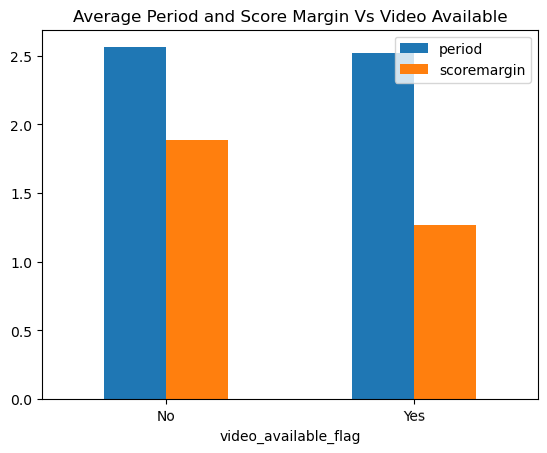

In [203]:
(
    nba_df_copy
    .groupby('video_available_flag')
    .mean()
    .rename(index={0: 'No', 1: 'Yes'}).plot.bar(title="Average Period and Score Margin Vs Video Available", rot=1)
);

From this histogram, a prediction can be made that home teams (positive values) win NBA games more often than visitor teams (negative values)

<Axes: ylabel='Frequency'>

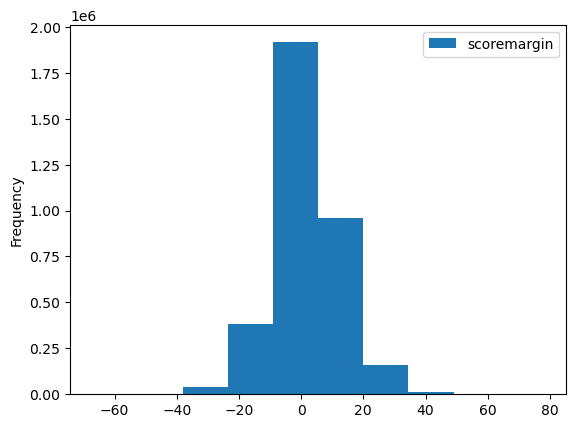

In [205]:
nba_df_copy[['scoremargin']].plot.hist()

Now only using the 8th period (the maximum, or last, period), a prediction can be made that visitor teams (negative values) win NBA games more often than home teams (positive values)

<Axes: ylabel='Frequency'>

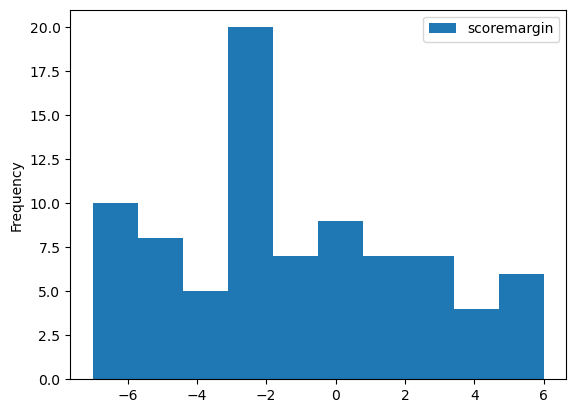

In [210]:
nba_df_copy.loc[nba_df_copy['period'] == nba_df_copy['period'].max()][['scoremargin']].plot.hist()

In conclusion, it appears that home teams often have a higher score margin throughout the duration of the game. However, visitor teams often have a larger score margin during the last period (8) of games. Therefore, it can be predicted that visitor teams win games more often than home teams because their score margin is oftentimes higher during the last period of the game.

A caveat of this prediction, though, is that the number of score margin values during the 8th period is only 83, much less than during other periods of the game, so it is more likely that home teams win games more often than visitor teams.

In [213]:
nba_df_copy['period'].value_counts()

period
4    885272
2    872306
3    862000
1    818344
5     25723
6      3522
7       518
8        83
Name: count, dtype: Int64

Examining the 4th period, which has a lot more data points than the 8th period, we can see that indeed the score margin for the home teams is greater than that of the visitor teams.

<Axes: ylabel='Frequency'>

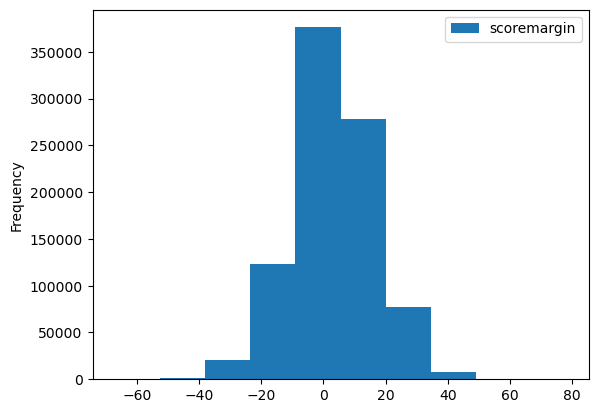

In [214]:
nba_df_copy.loc[nba_df_copy['period'] == 4][['scoremargin']].plot.hist()